In [23]:
import numpy as np
from src.utils.data_loader import load_eegbci_data, create_epochs_from_raw, create_train_set
from src.models.ANN import ANN

In [24]:
subjects = list(range(1, 20))
runs = [6, 10, 14]
raw = load_eegbci_data(subjects, runs)

Extracting EDF parameters from C:\Users\erik\IES_codebase\pythonProjects\EEG_Exoskeleton\data\raw_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\erik\IES_codebase\pythonProjects\EEG_Exoskeleton\data\raw_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\erik\IES_codebase\pythonProjects\EEG_Exoskeleton\data\raw_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\erik\IES_codebase\pythonProjects\EEG_Exoskeleton\data\raw_data\

In [25]:
# bandpass filter, keeping only alpha (8-12 Hz) and beta bands (12-30 (40?) Hz)
# raw.filter(l_freq=8, h_freq=30, fir_design='firwin', skip_by_annotation='edge')

In [26]:
event_id = dict(hands=2, feet=3)
epochs = create_epochs_from_raw(raw, tmin=-1, tmax=4, event_id=event_id, baseline=None)

Used Annotations descriptions: ['T0', 'feet', 'hands']
Ignoring annotation durations and creating fixed-duration epochs around annotation onsets.
Not setting metadata
855 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 855 events and 801 original time points ...
0 bad epochs dropped


In [27]:
X, y = create_train_set(epochs, tmin=-1, tmax=4.0)

In [28]:
X.shape

(855, 64, 801)

In [29]:
y.shape

(855,)

In [30]:
input_shape = X.shape[1:]
output_shape = 1
units = [1280, 640, 128]
activation_function = 'tanh'
learning_rate = 0.003
l2_lambda = 0.0001

In [31]:
ann = ANN(input_shape, output_shape, units, activation_function, learning_rate)

In [32]:
ann.fit(X, y, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
11/11 - 10s - 924ms/step - AUC: 0.4721 - accuracy: 0.4722 - loss: 0.7031 - val_AUC: 0.7394 - val_accuracy: 0.5673 - val_loss: 0.6664
Epoch 2/50
11/11 - 6s - 508ms/step - AUC: 0.6787 - accuracy: 0.6140 - loss: 0.6598 - val_AUC: 0.7408 - val_accuracy: 0.5789 - val_loss: 0.6632
Epoch 3/50
11/11 - 6s - 515ms/step - AUC: 0.7936 - accuracy: 0.6038 - loss: 0.6295 - val_AUC: 0.7492 - val_accuracy: 0.7193 - val_loss: 0.6309
Epoch 4/50
11/11 - 5s - 496ms/step - AUC: 0.8356 - accuracy: 0.7588 - loss: 0.5287 - val_AUC: 0.7042 - val_accuracy: 0.6199 - val_loss: 0.7693
Epoch 5/50
11/11 - 5s - 482ms/step - AUC: 0.8495 - accuracy: 0.7646 - loss: 0.4924 - val_AUC: 0.7075 - val_accuracy: 0.6667 - val_loss: 0.7330
Epoch 6/50
11/11 - 5s - 482ms/step - AUC: 0.8934 - accuracy: 0.8173 - loss: 0.4170 - val_AUC: 0.6783 - val_accuracy: 0.6140 - val_loss: 0.8268
Epoch 7/50
11/11 - 5s - 482ms/step - AUC: 0.9084 - accuracy: 0.8304 - loss: 0.3916 - val_AUC: 0.6994 - val_accuracy: 0.6374 - val_loss: 0.786

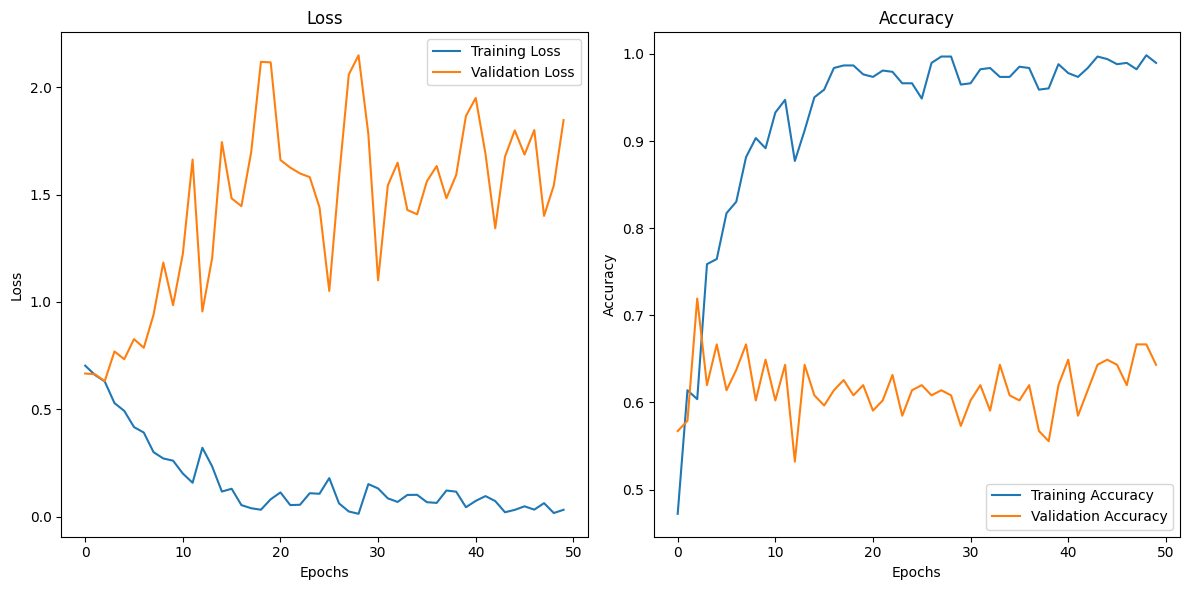

In [34]:
ann.plot_history()